In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("C:/Users/USER/Documents/Data Practise/Python/House Advanced Pricing/train.csv")

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
len(train)

1460

In [4]:
test = pd.read_csv("C:/Users/USER/Documents/Data Practise/Python/House Advanced Pricing/test.csv")

In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
len(test)

1459

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.isnull()['PoolQC'].sum()

1453

In [9]:
train.isnull().sum().sum()/len(train)

5.362328767123287

In [10]:
drop_item = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']

In [11]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [12]:
train1 = train.drop(drop_item, axis=1)

In [13]:
train1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [14]:
test1 = test.drop(drop_item, axis=1)

In [15]:
test1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [16]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
train1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [18]:
train1['LotFrontage'].fillna(train1['LotFrontage'].mean(), inplace=True)

In [19]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
test1['LotFrontage'].fillna(test1['LotFrontage'].mean(), inplace=True)

In [21]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [22]:
Q1 = train1['SalePrice'].quantile(0.25)
Q3 = train1['SalePrice'].quantile(0.75)
Q1,Q3

(129975.0, 214000.0)

In [23]:
IQR = Q3-Q1
IQR

84025.0

In [24]:
upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR
upperlimit, lowerlimit

(340037.5, 3937.5)

In [25]:
train1[train1['SalePrice'] > upperlimit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.000000,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,345000
53,54,20,RL,68.000000,50271,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,11,2006,WD,Normal,385000
58,59,60,RL,66.000000,13682,Pave,IR2,HLS,AllPub,CulDSac,...,37,0,0,0,0,10,2006,New,Partial,438780
112,113,60,RL,77.000000,9965,Pave,Reg,Lvl,AllPub,Inside,...,0,0,168,0,0,10,2007,New,Partial,383970
151,152,20,RL,107.000000,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,70.049958,14100,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.000000,14720,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2010,WD,Normal,410000
1373,1374,20,RL,70.049958,11400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.000000,14892,Pave,IR1,HLS,AllPub,CulDSac,...,0,0,0,0,0,10,2009,WD,Normal,377500


In [26]:
train1[train1['SalePrice'] < lowerlimit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [27]:
train2 = train1[(train1['SalePrice'] < upperlimit) & (train1['SalePrice'] > lowerlimit)]

In [28]:
train2.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1399.0,733.508935,422.811873,1.0,367.5,739.000000,1098.50,1460.0
MSSubClass,1399.0,57.487491,42.803603,20.0,20.0,50.000000,70.00,190.0
LotFrontage,1399.0,69.240021,21.526220,21.0,60.0,70.049958,78.00,313.0
LotArea,1399.0,10155.280915,8324.834198,1300.0,7442.0,9317.000000,11316.50,164660.0
OverallQual,1399.0,5.983560,1.282272,1.0,5.0,6.000000,7.00,10.0
OverallCond,1399.0,5.591137,1.118236,1.0,5.0,5.000000,6.00,9.0
YearBuilt,1399.0,1970.080772,30.009463,1872.0,1953.0,1971.000000,1999.00,2009.0
YearRemodAdd,1399.0,1984.058613,20.661160,1950.0,1966.0,1992.000000,2003.00,2010.0
MasVnrArea,1392.0,90.176724,159.492384,0.0,0.0,0.000000,144.00,1600.0
BsmtFinSF1,1399.0,417.333095,428.401771,0.0,0.0,370.000000,686.00,5644.0


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


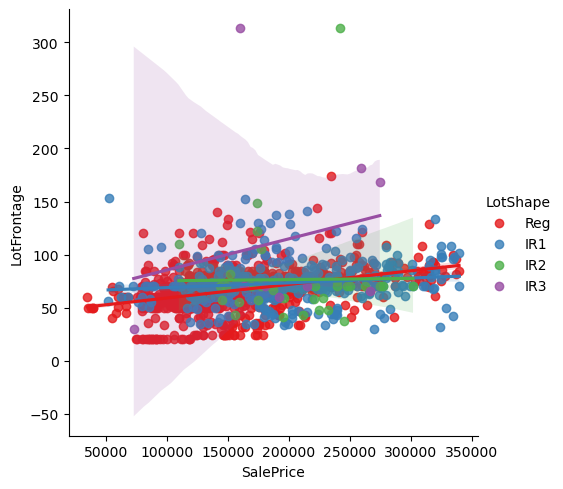

In [29]:
sns.lmplot(data=train2, x='SalePrice', y='LotFrontage', hue='LotShape', palette="Set1")
plt.show()

In [30]:
Q1 = train2['LotArea'].quantile(0.25)
Q3 = train2['LotArea'].quantile(0.75)
Q1, Q3

(7442.0, 11316.5)

In [31]:
IQR = Q3 - Q1

In [32]:
upplimit = Q3 + 1.5*IQR
lowlimit = Q1 - 1.5*IQR
upplimit, lowlimit

(17128.25, 1630.25)

In [33]:
train2[train2['LotArea'] > upplimit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
66,67,20,RL,70.049958,19900,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2010,WD,Normal,180000
113,114,20,RL,70.049958,21000,Pave,Reg,Bnk,AllPub,Corner,...,192,0,0,0,0,10,2007,COD,Abnorml,217000
120,121,80,RL,70.049958,21453,Pave,IR1,Low,AllPub,CulDSac,...,0,130,0,0,0,10,2006,WD,Normal,180000
159,160,60,RL,134.000000,19378,Pave,IR1,HLS,AllPub,Corner,...,0,168,0,0,0,3,2006,New,Partial,320000
171,172,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1424,80,RL,70.049958,19690,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,738,0,8,2006,WD,Alloca,274970
1430,1431,60,RL,60.000000,21930,Pave,IR3,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Normal,192140
1434,1435,20,RL,80.000000,17400,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,160000
1446,1447,20,RL,70.049958,26142,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,4,2010,WD,Normal,157900


In [34]:
train2[train2['LotArea'] < lowlimit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
75,76,180,RM,21.0,1596,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2009,WD,Normal,91000
489,490,180,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,86000
614,615,180,RM,21.0,1491,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,75500
956,957,160,RM,24.0,1300,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,124000
1038,1039,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,97000
1039,1040,180,RM,21.0,1477,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2009,WD,Normal,80000
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2006,WD,Abnorml,92000


In [35]:
train3 = train2[(train2['LotArea'] < upplimit) & (train2['LotArea'] > lowlimit)]

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


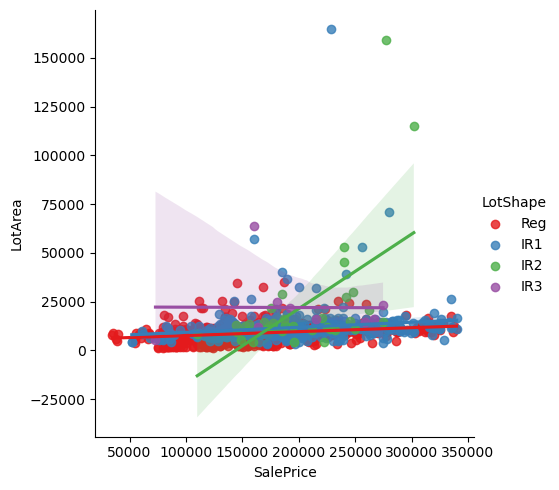

In [36]:
sns.lmplot(data=train2, x='SalePrice', y='LotArea', hue='LotShape', palette="Set1")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


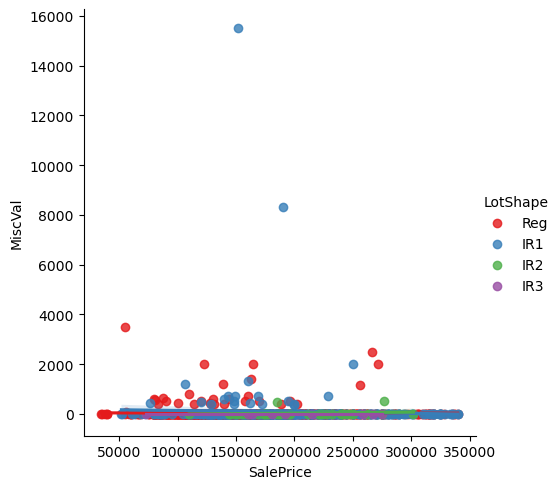

In [37]:
sns.lmplot(data=train2, x='SalePrice', y='MiscVal', hue='LotShape', palette="Set1")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


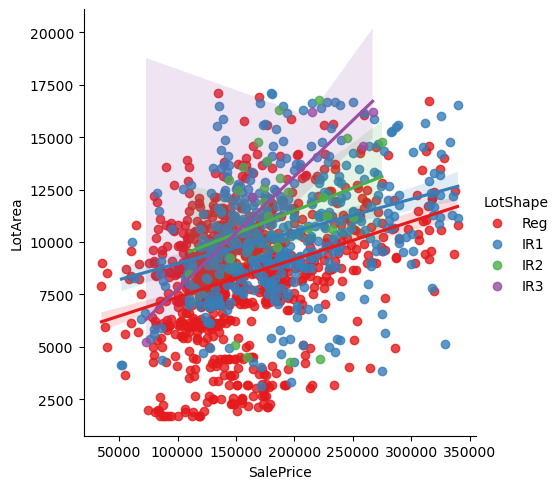

In [38]:
sns.lmplot(data=train3, x='SalePrice', y='LotArea', hue='LotShape', palette="Set1")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


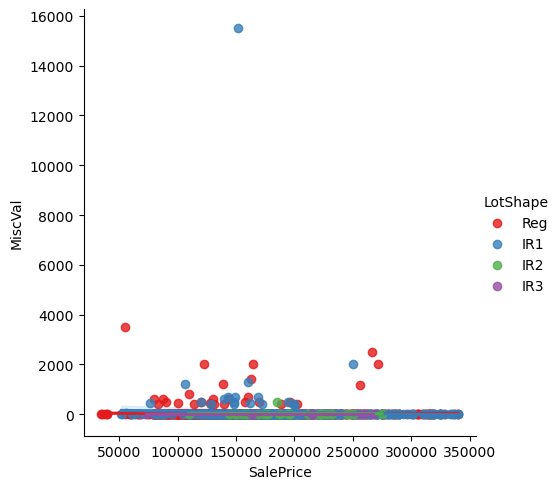

In [39]:
sns.lmplot(data=train3, x='SalePrice', y='MiscVal', hue='LotShape', palette="Set1")
plt.show()

In [40]:
Q1 = test1['LotArea'].quantile(0.25)
Q3 = test1['LotArea'].quantile(0.75)
Q1, Q3

(7391.0, 11517.5)

In [41]:
IQR = Q3 - Q1
IQR

4126.5

In [42]:
uplimit = Q3 + 1.5*IQR
lolimit = Q1 - 1.5*IQR
uplimit, lolimit

(17707.25, 1201.25)

In [43]:
test1[test1['LotArea'] > uplimit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
22,1483,20,RL,100.000000,18494,Pave,IR1,Lvl,AllPub,Corner,...,23,0,0,0,0,0,1,2010,WD,Normal
47,1508,50,RL,68.580357,18837,Pave,IR1,Lvl,AllPub,Inside,...,69,0,0,0,0,0,4,2010,WD,Normal
105,1566,20,RL,68.580357,20062,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,Normal
108,1569,50,RL,124.000000,18600,Pave,Reg,Lvl,AllPub,Inside,...,0,60,0,0,0,450,6,2010,WD,Normal
137,1598,80,RL,85.000000,19645,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,6,2010,WD,Normal
206,1667,60,RL,59.000000,23303,Pave,IR3,Lvl,AllPub,CulDSac,...,273,0,0,0,0,0,6,2009,WD,Family
394,1855,80,RL,66.000000,19255,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,600,9,2009,WD,Normal
396,1857,70,RL,120.000000,26400,Pave,Reg,Bnk,AllPub,FR2,...,0,0,0,0,0,0,6,2009,WD,Normal
455,1916,30,NaN,109.000000,21780,Grvl,Reg,Lvl,NaN,Inside,...,24,0,0,0,0,0,3,2009,ConLD,Normal
485,1946,20,RL,68.580357,31220,Pave,IR1,Bnk,NaN,FR2,...,0,144,0,0,0,750,5,2008,WD,Normal


In [44]:
test1[test1['LotArea'] < lolimit]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [45]:
test2 = test1[(test1['LotArea'] < uplimit) & (test1['LotArea'] > lolimit)]

In [46]:
test2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,...,34,0,0,0,0,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [47]:
train3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [48]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1326 non-null   int64  
 1   MSSubClass     1326 non-null   int64  
 2   MSZoning       1326 non-null   object 
 3   LotFrontage    1326 non-null   float64
 4   LotArea        1326 non-null   int64  
 5   Street         1326 non-null   object 
 6   LotShape       1326 non-null   object 
 7   LandContour    1326 non-null   object 
 8   Utilities      1326 non-null   object 
 9   LotConfig      1326 non-null   object 
 10  LandSlope      1326 non-null   object 
 11  Neighborhood   1326 non-null   object 
 12  Condition1     1326 non-null   object 
 13  Condition2     1326 non-null   object 
 14  BldgType       1326 non-null   object 
 15  HouseStyle     1326 non-null   object 
 16  OverallQual    1326 non-null   int64  
 17  OverallCond    1326 non-null   int64  
 18  YearBuilt    

In [49]:
train3.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
train4 = train3.drop(['LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'], axis=1)

In [51]:
train4

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,7,5,2003,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,6,8,1976,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,7,5,2001,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,7,5,1915,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,8,5,2000,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,6,5,1999,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,6,6,1978,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,7,9,1941,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,5,6,1950,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [52]:
test3 = test2.drop(['LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'], axis=1)

In [53]:
test3.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'SaleType', 'SaleCondition'], dtype='object')

In [54]:
test3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,5,6,1961,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,6,6,1958,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,5,5,1997,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,6,6,1998,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,8,5,1992,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,RM,21.0,1526,Pave,Reg,4,5,1970,...,34,0,0,0,0,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,Reg,4,7,1970,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,4,5,1970,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,5,5,1992,...,32,0,0,0,0,700,7,2006,WD,Normal


In [55]:
train4.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'SaleType', 'SaleCondition'], dtype='object')

In [56]:
train5 = pd.get_dummies(train4, columns=['MSZoning', 'Street', 'LotShape', 'SaleType', 'SaleCondition'], 
                       drop_first=True, dtype=float)

In [57]:
train5

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [58]:
test4 = pd.get_dummies(test3, columns=['MSZoning', 'Street', 'LotShape', 'SaleType', 'SaleCondition'], 
                       drop_first=True, dtype=float)

In [59]:
test4

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,21.0,1526,4,5,1970,1970,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [60]:
test4.select_dtypes(['object']).columns

Index([], dtype='object')

In [61]:
train5.select_dtypes(['object']).columns

Index([], dtype='object')

In [62]:
train6 = train5.copy()

In [63]:
X = train6.drop(['SalePrice'], axis=1)

In [64]:
X.drop(['Id'], axis=1, inplace=True)

In [65]:
y = train6['SalePrice']

In [66]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1326, dtype: int64

In [67]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [68]:
ID = test4['Id']

In [69]:
test4.drop(['Id'], axis=1, inplace=True)

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1326 non-null   int64  
 1   LotFrontage            1326 non-null   float64
 2   LotArea                1326 non-null   int64  
 3   OverallQual            1326 non-null   int64  
 4   OverallCond            1326 non-null   int64  
 5   YearBuilt              1326 non-null   int64  
 6   YearRemodAdd           1326 non-null   int64  
 7   MasVnrArea             1320 non-null   float64
 8   BsmtFinSF1             1326 non-null   int64  
 9   BsmtFinSF2             1326 non-null   int64  
 10  BsmtUnfSF              1326 non-null   int64  
 11  TotalBsmtSF            1326 non-null   int64  
 12  1stFlrSF               1326 non-null   int64  
 13  2ndFlrSF               1326 non-null   int64  
 14  LowQualFinSF           1326 non-null   int64  
 15  GrLivArea

In [71]:
X.drop(['MasVnrArea','GarageYrBlt'], axis=1, inplace=True)

In [72]:
test4.drop(['MasVnrArea','GarageYrBlt'], axis=1, inplace=True)

In [73]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,0,953,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,20,85.0,13175,6,6,1978,1988,790,163,589,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,70,66.0,9042,7,9,1941,2006,275,0,877,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,20,68.0,9717,5,6,1950,1996,49,1029,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [74]:
test4

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,468.0,144.0,270.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,81.0,14267,6,6,1958,1958,923.0,0.0,406.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60,74.0,13830,5,5,1997,1998,791.0,0.0,137.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60,78.0,9978,6,6,1998,1998,602.0,0.0,324.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,120,43.0,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,160,21.0,1526,4,5,1970,1970,0.0,0.0,546.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1455,160,21.0,1894,4,5,1970,1970,252.0,0.0,294.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, explained_variance_score, mean_absolute_error, mean_squared_error 

In [76]:
lr = LinearRegression()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [78]:
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
lr.score(X_test, y_test)

0.8530587268788015

In [80]:
lr.intercept_

-1287443.3672355663

In [81]:
lr.coef_

array([-3.38800340e+01,  4.03341774e+01,  1.53089761e+00,  1.16540679e+04,
        4.93794516e+03,  3.48820383e+02,  1.97578676e+02,  1.55742620e+01,
        1.96820528e+00,  9.87531171e-01,  1.85299984e+01,  2.01805598e+01,
        2.56261719e+01, -1.16872565e+01,  3.41194752e+01,  1.12586377e+03,
       -2.88628232e+03, -2.29376389e+03, -4.32198546e+03, -5.57892524e+03,
       -1.42386713e+04,  4.32866856e+02,  1.59406779e+03,  3.77789921e+03,
        1.48353123e+01,  1.19702970e+01,  2.28153350e+01,  2.09045943e+01,
       -1.88707924e+01,  3.87885790e+01,  1.43192185e+01, -2.73767131e-01,
        5.13401320e+02,  6.07946697e+01,  3.40672691e+04,  2.66284603e+04,
        2.56018755e+04,  1.93151646e+04,  9.52651117e+03, -2.91758050e+03,
        1.19129942e+03, -3.50115731e+03,  4.54289098e+04,  5.45696821e-12,
        1.99201878e+04, -1.57202052e+04,  9.11970142e+03, -1.68600030e+04,
        4.20498383e+04,  1.13548508e+04,  2.92421481e+04,  2.34398814e+03,
       -3.51900598e+03,  

In [82]:
prediction = lr.predict(X_test)

In [83]:
explained_variance_score(y_test, prediction)

0.8531367178710095

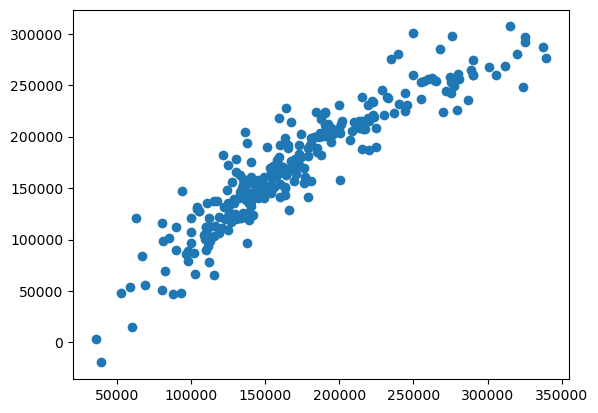

In [84]:
plt.scatter(y_test, prediction)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


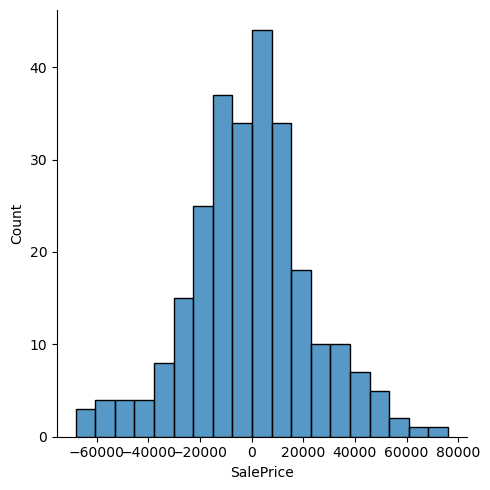

In [85]:
sns.displot((y_test - prediction))
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5116\2432660715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - prediction))


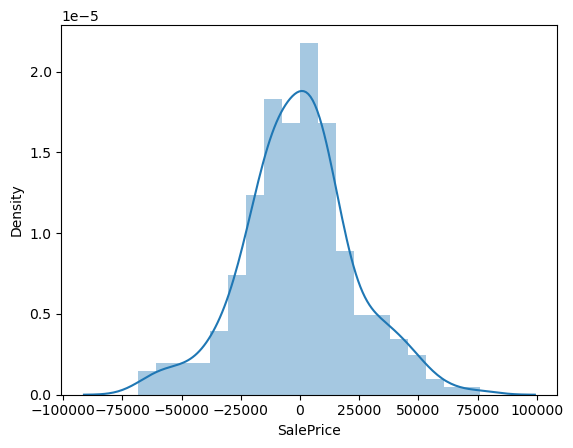

In [86]:
sns.distplot((y_test - prediction))
plt.show()

In [87]:
from sklearn import metrics
print('MAE :-',round(metrics.mean_absolute_error(y_test, prediction),2))
print('MSE :-',round(metrics.mean_squared_error(y_test, prediction),3))
print('SMSE :-',round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2))

MAE :- 17723.68
MSE :- 547355735.998
SMSE :- 23395.63


In [88]:
### Using PCA to select the right 
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA

In [89]:
scaled = minmax_scale(X)
pca = PCA(0.98)

In [90]:
X_pca = pca.fit_transform(X)

In [91]:
X_pca.shape

(1326, 5)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [93]:
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
lrpca = LinearRegression()

In [95]:
lrpca.fit(X_trainpca, y_trainpca)

LinearRegression()

In [96]:
lrpca.score(X_testpca, y_testpca)

0.8624951973738937

In [97]:
prediction_pca = lrpca.predict(X_testpca)

In [98]:
explained_variance_score(y_testpca, prediction_pca)

0.8626061631983161

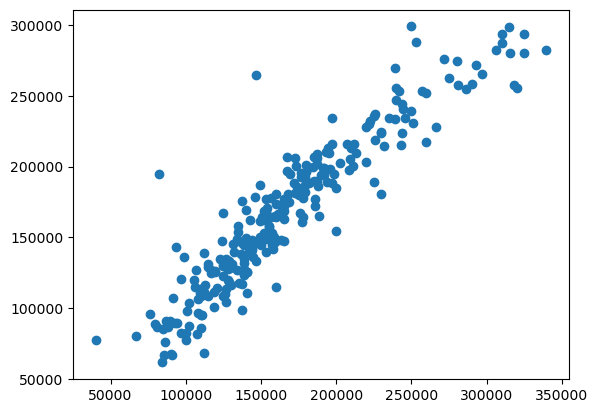

In [99]:
plt.scatter(y_testpca, prediction_pca)